In [94]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [95]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [127]:
from plot_prop import *
from plot_projections import *
from plot_param import *
from prop_info import *
from get_segments import blade_alone, get_segments_points, get_planes
from new_projections import *
from parameters import *
from output_xfoil import *

In [97]:
import csv
import sys

In [98]:
propeller = pd.read_csv('propeller_data.csv')

In [99]:
#positions = [40, 70]
positions = np.linspace(15, 100, 18).tolist()

In [100]:
#####################################################################################################
##########################            PRE-PROCESSING            #####################################
#####################################################################################################
propeller_coords, vect_length, vect_out, vect_side = prepare_propeller(propeller)

dmiddle, dlowest, dhighest   = d_blade(vect_length, propeller_coords)                     #d of plan ax+by+cx+d = 0
upper_blade, lower_blade     = blade_alone(propeller_coords, vect_length, dmiddle)        #points of each blades

In [101]:
planes = get_planes_xfoil(upper_blade, dmiddle, dhighest, vect_length, positions) #get equations of planes for projection

In [102]:
all_plane_points = get_points(upper_blade, planes)                   #get points used for each projection

Points of plane 1
Points of plane 2
Points of plane 3
Points of plane 4
Points of plane 5
Points of plane 6
Points of plane 7
Points of plane 8
Points of plane 9
Points of plane 10
Points of plane 11
Points of plane 12
Points of plane 13
Points of plane 14
Points of plane 15
Points of plane 16
Points of plane 17
Points of plane 18


In [103]:
#####################################################################################################
##########################              PROJECTION              #####################################
#####################################################################################################
right_param, left_param, right_pts, left_pts = get_all_projections(planes, all_plane_points)

10
13
8
12
8
11
10
13
7
12
10
13
10
11
7
11
8
11
7
11
10
14
7
10
9
11
9
11
9
12
14
13
6
8
3
2


In [104]:
x_list, y_right_list, y_left_list, rm = get_generated_points_xfoil(right_param, left_param, right_pts, left_pts)

Plane 17 has been removed
Warning a plane has been removed (did not have enough point during interpolation)


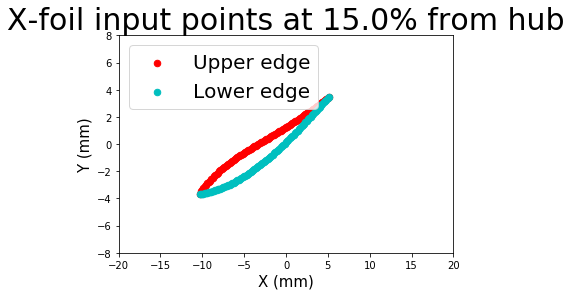

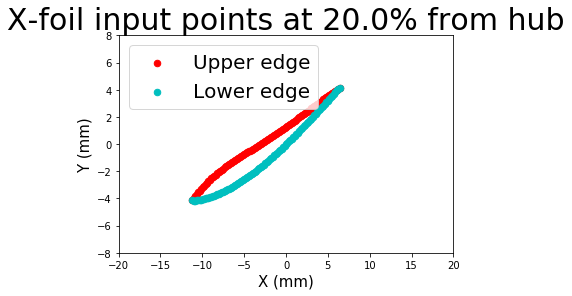

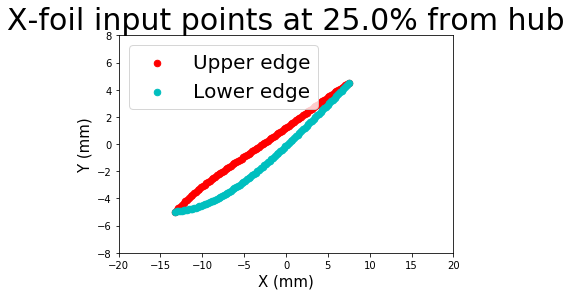

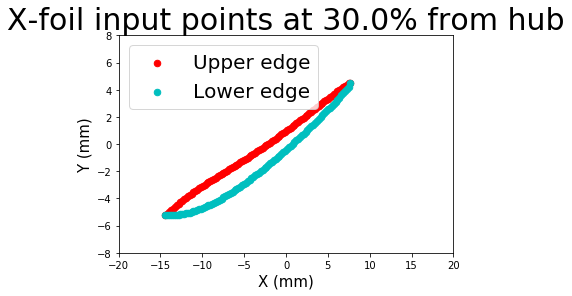

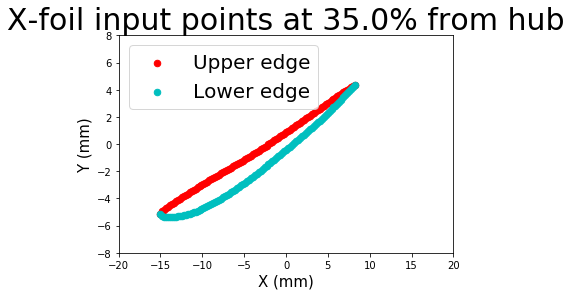

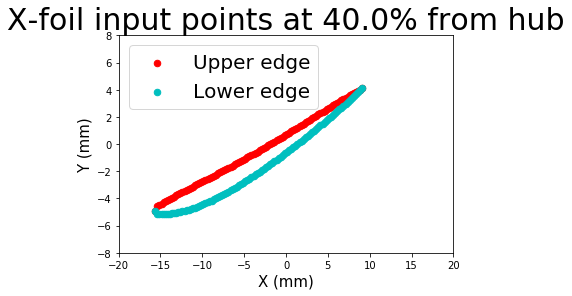

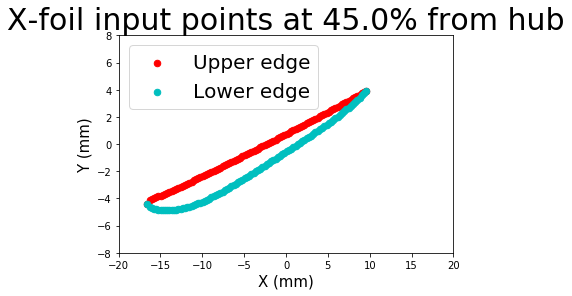

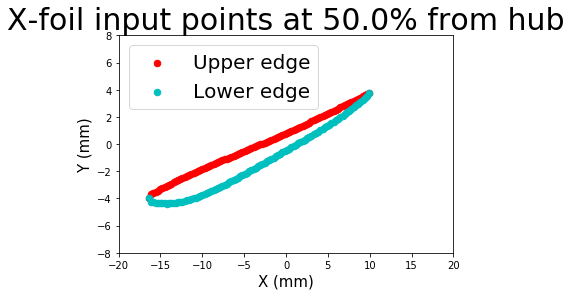

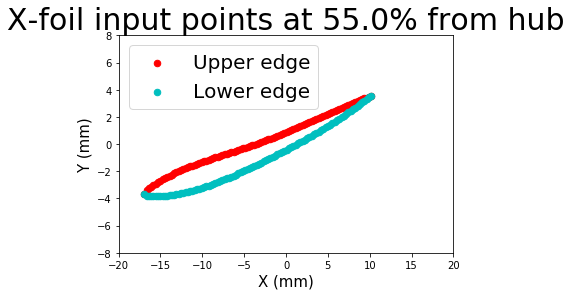

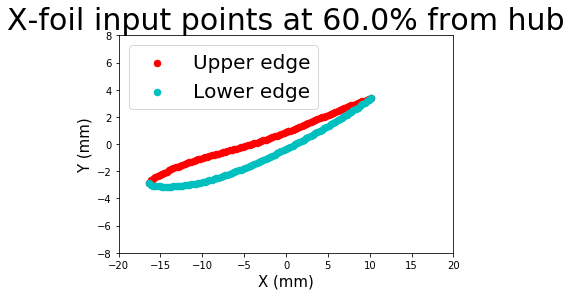

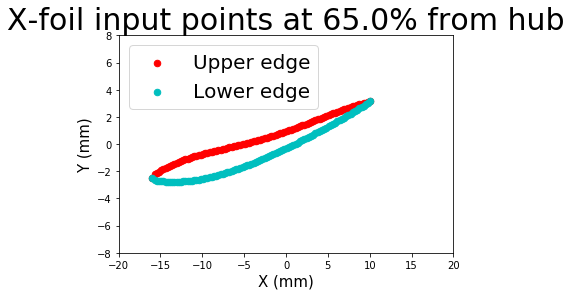

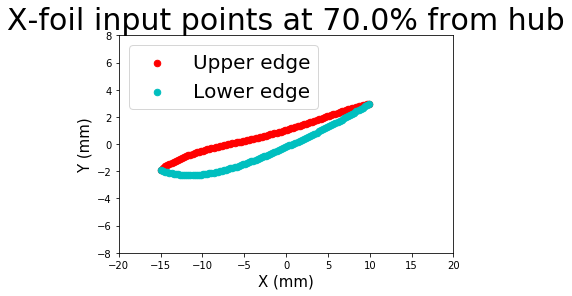

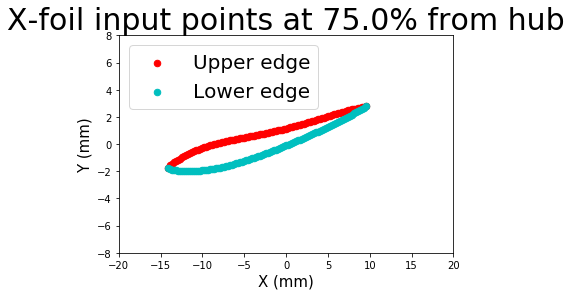

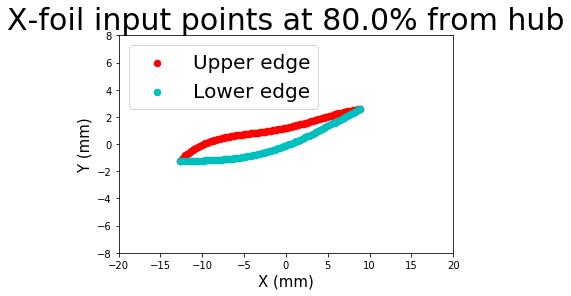

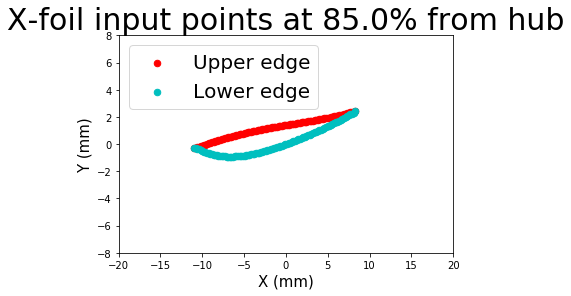

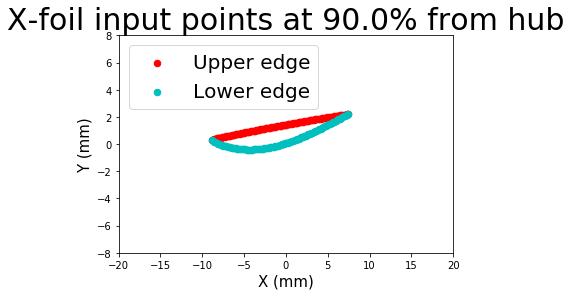

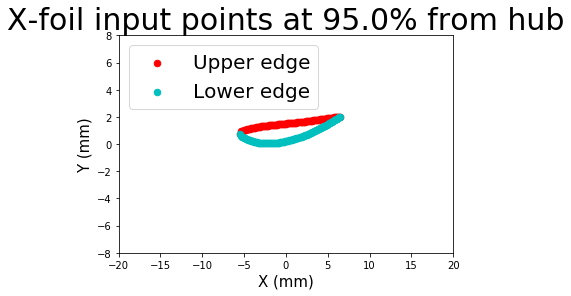

In [108]:
for i in range(len(all_plane_points) - rm):
    plot_xfoil( x_list[i], y_right_list[i], y_left_list[i], positions[i] )

In [131]:
#blade_twist = xfoil_get_blade_twist(x, y_right_list, y_left_list)
tip_radius = get_tip_radius(propeller_coords)
blade_twist = get_blade_twist(x_list, y_right_list, y_left_list)
chord_length = get_chord_length(x_list, y_right_list, y_left_list)

In [132]:
chord_length_normalized = [x/tip_radius for x in chord_length]

In [134]:
def plot_chord_length_comparison(chord_length, positions):
    fig = plt.figure()
    theoretical = [0.109, 0.132, 0.156, 0.176, 0.193, 0.206, 0.216, 0.223, 0.226, 0.225, 0.219, 0.21, 0.197, 0.179, 0.157, 0.13, 0.087]    
    plt.plot(positions, chord_length, color="blue", linewidth=2.5, label = "Computed")  
    plt.plot(positions, theoretical, color="green", linewidth=2.5, label = "Real")
    plt.xlabel('r/R', fontsize=15)    
    plt.ylabel('c/R', fontsize=15)
    plt.title("Chord length", fontsize=20)
    plt.legend()
    fig.savefig('Report/plots/Chord_length_comparison.png')
    plt.show()

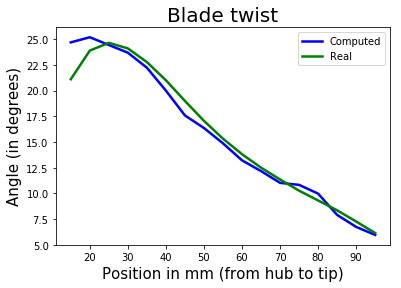

In [128]:
plot_blade_twist_comparison(blade_twist, positions[:-1])

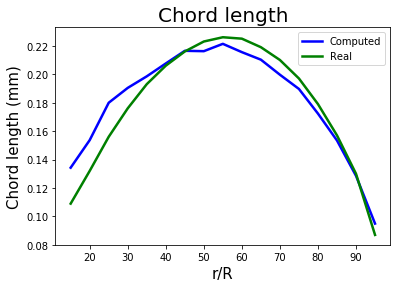

In [135]:
plot_chord_length_comparison(chord_length_normalized, positions[:-1])

In [85]:
x_r_rotated, y_r_rotated, x_l_rotated, y_l_rotated = align_aerofoil(x_list, y_right_list, y_left_list, blade_twist)

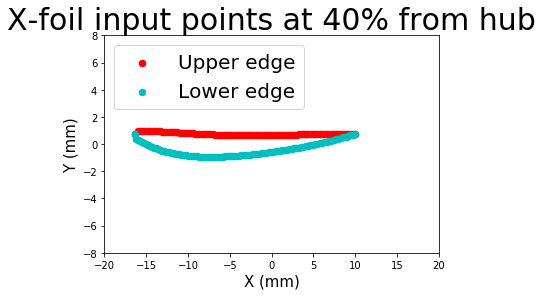

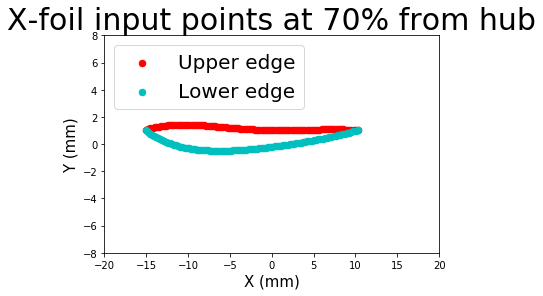

In [86]:
for i in range(len(all_plane_points) - rm):
    plot_xfoil_aligned(x_r_rotated[i], y_r_rotated[i], x_l_rotated[i], y_l_rotated[i], positions[i])

In [88]:
for i, pos in enumerate(positions):
    xfoil_input_data(x_r_rotated[i], y_right_list[i], x_l_rotated[i], y_left_list[i], pos)